In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from numpy import load
from numpy import expand_dims
from numpy import asarray
import os
import matplotlib.image as mpimg
from sklearn.decomposition import PCA
import time
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import lightgbm as lgb
import xgboost as xgb

In [4]:
gait_label = {"001":1, "002":2, "003":3, "004":4, "005":5, "006":6}
face_label = {"Aayush" : 1, "Ajita" : 2, "Aradhana" : 3, "Ashish" : 4, "Komal": 5, "Rudra" : 6}

In [5]:
gait_train_path_000 = "C:\\Users\\Aayush Kandpal\\Downloads\\Gait Split-20210121T155805Z-001\\Gait Split\\000\\train"
gait_train_path_054 = "C:\\Users\\Aayush Kandpal\\Downloads\\Gait Split-20210121T155805Z-001\\Gait Split\\054\\train"
gait_train_path_090 = "C:\\Users\\Aayush Kandpal\\Downloads\\Gait Split-20210121T155805Z-001\\Gait Split\\090\\train"
face_train_path = "C:\\Users\\Aayush Kandpal\\Downloads\\Face_dataset_ML\\Face_dataset\\train"

gait_val_path_000 = "C:\\Users\\Aayush Kandpal\\Downloads\\Gait Split-20210121T155805Z-001\\Gait Split\\000\\val"
gait_val_path_054 = "C:\\Users\\Aayush Kandpal\\Downloads\\Gait Split-20210121T155805Z-001\\Gait Split\\054\\val"
gait_val_path_090 = "C:\\Users\\Aayush Kandpal\\Downloads\\Gait Split-20210121T155805Z-001\\Gait Split\\090\\val"
face_val_path = "C:\\Users\\Aayush Kandpal\\Downloads\\Face_dataset_ML\\Face_dataset\\val"

gait_test_path_000 = "C:\\Users\\Aayush Kandpal\\Downloads\\Gait Split-20210121T155805Z-001\\Gait Split\\000\\test"
gait_test_path_054 = "C:\\Users\\Aayush Kandpal\\Downloads\\Gait Split-20210121T155805Z-001\\Gait Split\\054\\test"
gait_test_path_090 = "C:\\Users\\Aayush Kandpal\\Downloads\\Gait Split-20210121T155805Z-001\\Gait Split\\090\\test"
face_test_path = "C:\\Users\\Aayush Kandpal\\Downloads\\Face_dataset_ML\\Face_dataset\\test"


In [6]:

file = os.listdir(face_train_path)
file


['Aayush', 'Ajita', 'Aradhana', 'Ashish', 'Komal', 'Rudra']

In [7]:
def create_dataset(img_folder):
    
    img_data_array=[]
    class_name=[]
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= np.array(Image.open(image_path))
            image= np.resize(image,(224,224))
            image = image.astype('float32')
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array , class_name

In [8]:
train_0,class_0=create_dataset(gait_train_path_000)
train_54,class_54=create_dataset(gait_train_path_000)
train_90,class_90=create_dataset(gait_train_path_000)
face_train,train_class=create_dataset(face_train_path)


val_0,class_val_0=create_dataset(gait_val_path_000)
val_54,class_val_54=create_dataset(gait_val_path_054)
val_90,class_val_90=create_dataset(gait_val_path_090)
face_val,val_class=create_dataset(face_val_path)

test_0,class_test_0=create_dataset(gait_test_path_000)
test_54,class_test_54=create_dataset(gait_test_path_054)
test_90,class_test_90=create_dataset(gait_test_path_090)
face_test,test_class=create_dataset(face_test_path)

x_train_0=np.array(train_0)
x_train_54=np.array(train_54)
x_train_90=np.array(train_90)
x_train_face=np.array(face_train)

x_val_0=np.array(val_0)
x_val_54=np.array(val_54)
x_val_90=np.array(val_90)
x_val_face=np.array(face_val)

x_test_0=np.array(test_0)
x_test_54=np.array(test_54)
x_test_90=np.array(test_90)
x_test_face=np.array(face_test)

train_label=np.array(class_0)
val_label=np.array(class_val_0)
test_label=np.array(class_test_0)


In [9]:
x_train_face.shape

(180, 224, 224)

In [10]:
# Let us now flatten the dataset and convert each 
x_train_0=pd.DataFrame(x_train_0.reshape((x_train_0.shape[0],224*224)))
x_train_54=pd.DataFrame(x_train_54.reshape((x_train_54.shape[0],224*224)))
x_train_90=pd.DataFrame(x_train_90.reshape((x_train_90.shape[0],224*224)))
x_train_face=pd.DataFrame(x_train_face.reshape((x_train_face.shape[0],224*224)))

x_val_0=pd.DataFrame(x_val_0.reshape((x_val_0.shape[0],224*224)))
x_val_54=pd.DataFrame(x_val_54.reshape((x_val_54.shape[0],224*224)))
x_val_90=pd.DataFrame(x_val_90.reshape((x_val_90.shape[0],224*224)))
x_val_face=pd.DataFrame(x_val_face.reshape((x_val_face.shape[0],224*224)))

x_test_0=pd.DataFrame(x_test_0.reshape((x_test_0.shape[0],224*224)))
x_test_54=pd.DataFrame(x_test_54.reshape((x_test_54.shape[0],224*224)))
x_test_90=pd.DataFrame(x_test_90.reshape((x_test_90.shape[0],224*224)))
x_test_face=pd.DataFrame(x_test_face.reshape((x_test_face.shape[0],224*224)))

train_label=pd.DataFrame(train_label).astype(int)
val_label=pd.DataFrame(val_label).astype(int)
test_label=pd.DataFrame(test_label).astype(int)


In [11]:
# Let us now make our dataset by concatenating all feature columns
train_data=pd.concat([x_train_face,x_train_0,x_train_54,x_train_90,train_label],axis=1)
val_data=pd.concat([x_val_face,x_val_0,x_val_54,x_val_90,val_label],axis=1)
test_data=pd.concat([x_test_face,x_test_0,x_test_54,x_test_90,test_label],axis=1)

In [12]:
train_data.columns = [*train_data.columns[:-1], 'label']
val_data.columns = [*val_data.columns[:-1], 'label']
test_data.columns = [*test_data.columns[:-1], 'label']

In [13]:
# Let us shuffle our datasets and reset the indices
train_data = train_data.sample(frac=1).reset_index(drop=True)
test_data = test_data.sample(frac=1).reset_index(drop=True)
val_data = val_data.sample(frac=1).reset_index(drop=True)
#train_data.to_csv('train_fusion.csv')
#test_data.to_csv('test_fusion.csv')
#val_data.to_csv('val_fusion.csv')

In [14]:
# Defining our target variable and feature data
X_train=train_data.drop('label',axis=1)
Y_train=train_data.label

X_test=test_data.drop('label',axis=1)
Y_test=test_data.label

X_val=val_data.drop('label',axis=1)
Y_val=val_data.label

In [15]:
# Now using PCA to reduce dimensionality
tic=time.time()
pca=PCA(n_components=0.99)

X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca=pca.transform(X_test)
toc=time.time()
print("Dimensionality reduced to:", pca.n_components_)
print("Time taken to reduce the size of the data : "+str((toc-tic))+" sec")

Dimensionality reduced to: 83
Time taken to reduce the size of the data : 33.91118240356445 sec


In [16]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train_pca,Y_train)


RandomForestClassifier()

In [17]:
val_pred=rf.predict(X_val_pca)
val_pred1=rf.predict(X_test_pca)

In [18]:
val_pred

array([4, 1, 4, 4, 1, 5, 2, 1, 4, 4, 5, 6, 5, 6, 5, 2, 4, 2, 4, 2, 5, 5,
       4, 1, 5, 4, 5, 5, 2, 5, 5, 5, 4, 6, 5, 4, 5, 5, 5, 4, 5, 2, 5, 2,
       5, 1, 6, 5, 1, 4, 6, 6, 2, 4, 4, 5, 5, 2, 6, 2])

In [19]:
print(classification_report(Y_val,val_pred))

              precision    recall  f1-score   support

           1       1.00      0.60      0.75        10
           2       1.00      1.00      1.00        10
           3       0.00      0.00      0.00        10
           4       0.67      1.00      0.80        10
           5       0.45      1.00      0.62        10
           6       1.00      0.70      0.82        10

    accuracy                           0.72        60
   macro avg       0.69      0.72      0.67        60
weighted avg       0.69      0.72      0.67        60



C:\Users\Aayush Kandpal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
print(classification_report(Y_test,val_pred1))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        10
           2       0.50      0.70      0.58        10
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00        10
           6       0.00      0.00      0.00        10

    accuracy                           0.12        60
   macro avg       0.08      0.12      0.10        60
weighted avg       0.08      0.12      0.10        60



In [21]:
svm=LinearSVC()
svm.fit(X_train_pca,Y_train)

C:\Users\Aayush Kandpal\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [22]:
val_pred=svm.predict(X_val_pca)
print(classification_report(Y_val,val_pred))


              precision    recall  f1-score   support

           1       1.00      0.70      0.82        10
           2       0.77      1.00      0.87        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00        10

    accuracy                           0.95        60
   macro avg       0.96      0.95      0.95        60
weighted avg       0.96      0.95      0.95        60



In [23]:
val_pred1=svm.predict(X_test_pca)
print(classification_report(Y_test,val_pred1))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        10
           2       0.22      1.00      0.36        10
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00        10
           6       0.00      0.00      0.00        10

    accuracy                           0.17        60
   macro avg       0.04      0.17      0.06        60
weighted avg       0.04      0.17      0.06        60



C:\Users\Aayush Kandpal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
# the above results are weird because althought the accuracy may be very high. The AUC score is zero for all.
# Nevertheless let us try a few more models manually
lg=LogisticRegression(random_state=0,multi_class='auto',max_iter=250,verbose=5,n_jobs=-1)
lg.fit(X_train_pca,Y_train)
pred=lg.predict(X_val_pca)
print(classification_report(Y_val,pred))
print(accuracy_score(Y_val,pred))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


              precision    recall  f1-score   support

           1       1.00      0.20      0.33        10
           2       0.43      1.00      0.61        10
           3       1.00      0.50      0.67        10
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00        10

    accuracy                           0.78        60
   macro avg       0.91      0.78      0.77        60
weighted avg       0.91      0.78      0.77        60

0.7833333333333333


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   16.5s finished


In [25]:
pred1=lg.predict(X_test_pca)
print(classification_report(Y_test,pred1))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        10
           2       0.26      1.00      0.42        10
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00        10
           6       0.00      0.00      0.00        10

    accuracy                           0.17        60
   macro avg       0.04      0.17      0.07        60
weighted avg       0.04      0.17      0.07        60



C:\Users\Aayush Kandpal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
lgb_clf=lgb.LGBMClassifier()
lgb_clf.fit(X_train_pca,Y_train)
pred=lgb_clf.predict(X_val_pca)
print(classification_report(Y_val,pred))

              precision    recall  f1-score   support

           1       1.00      0.10      0.18        10
           2       0.75      0.90      0.82        10
           3       0.00      0.00      0.00        10
           4       0.27      0.70      0.39        10
           5       0.62      1.00      0.77        10
           6       1.00      0.30      0.46        10

    accuracy                           0.50        60
   macro avg       0.61      0.50      0.44        60
weighted avg       0.61      0.50      0.44        60



In [27]:
pred1=lgb_clf.predict(X_test_pca)
print(classification_report(Y_test,pred1))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00      10.0
           2       0.00      0.00      0.00      10.0
           3       0.00      0.00      0.00      10.0
           4       0.00      0.00      0.00      10.0
           5       0.00      0.00      0.00      10.0
           6       0.00      0.00      0.00      10.0

    accuracy                           0.00      60.0
   macro avg       0.00      0.00      0.00      60.0
weighted avg       0.00      0.00      0.00      60.0



C:\Users\Aayush Kandpal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


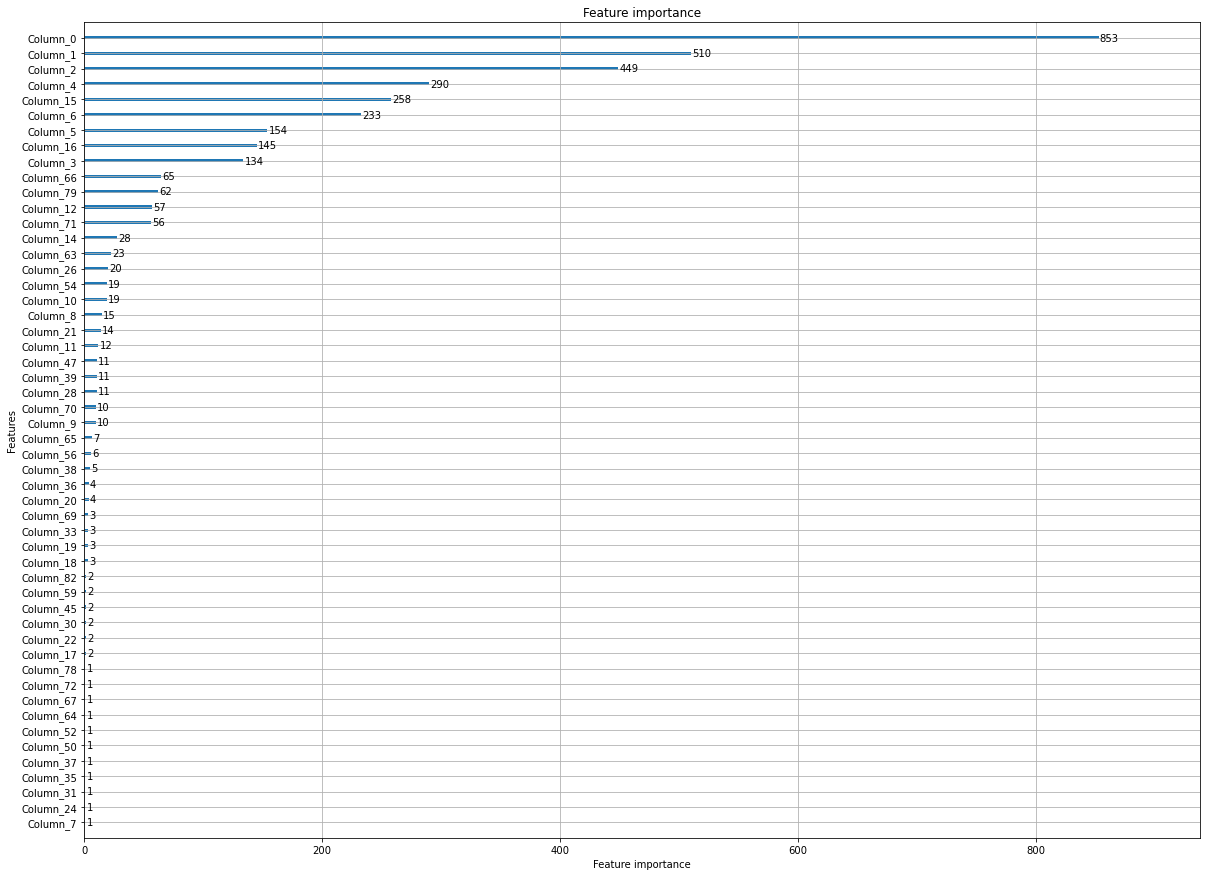

In [32]:
lgb.plot_importance(lgb_clf,figsize=(20,15))
plt.show()

In [29]:
xgb_clf=xgb.XGBClassifier()
xgb_clf.fit(X_train_pca,Y_train)
pred=xgb_clf.predict(X_val_pca)
print(classification_report(Y_val,pred))

              precision    recall  f1-score   support

           1       1.00      0.10      0.18        10
           2       0.75      0.90      0.82        10
           3       0.00      0.00      0.00        10
           4       1.00      0.70      0.82        10
           5       0.29      1.00      0.45        10
           6       0.83      0.50      0.62        10

    accuracy                           0.53        60
   macro avg       0.65      0.53      0.48        60
weighted avg       0.65      0.53      0.48        60



In [30]:
pred1=xgb_clf.predict(X_test_pca)
print(classification_report(Y_test,pred1))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00        10
           3       1.00      1.00      1.00        10
           4       0.00      0.00      0.00        10
           5       0.26      1.00      0.42        10
           6       0.00      0.00      0.00        10

    accuracy                           0.33        60
   macro avg       0.21      0.33      0.24        60
weighted avg       0.21      0.33      0.24        60



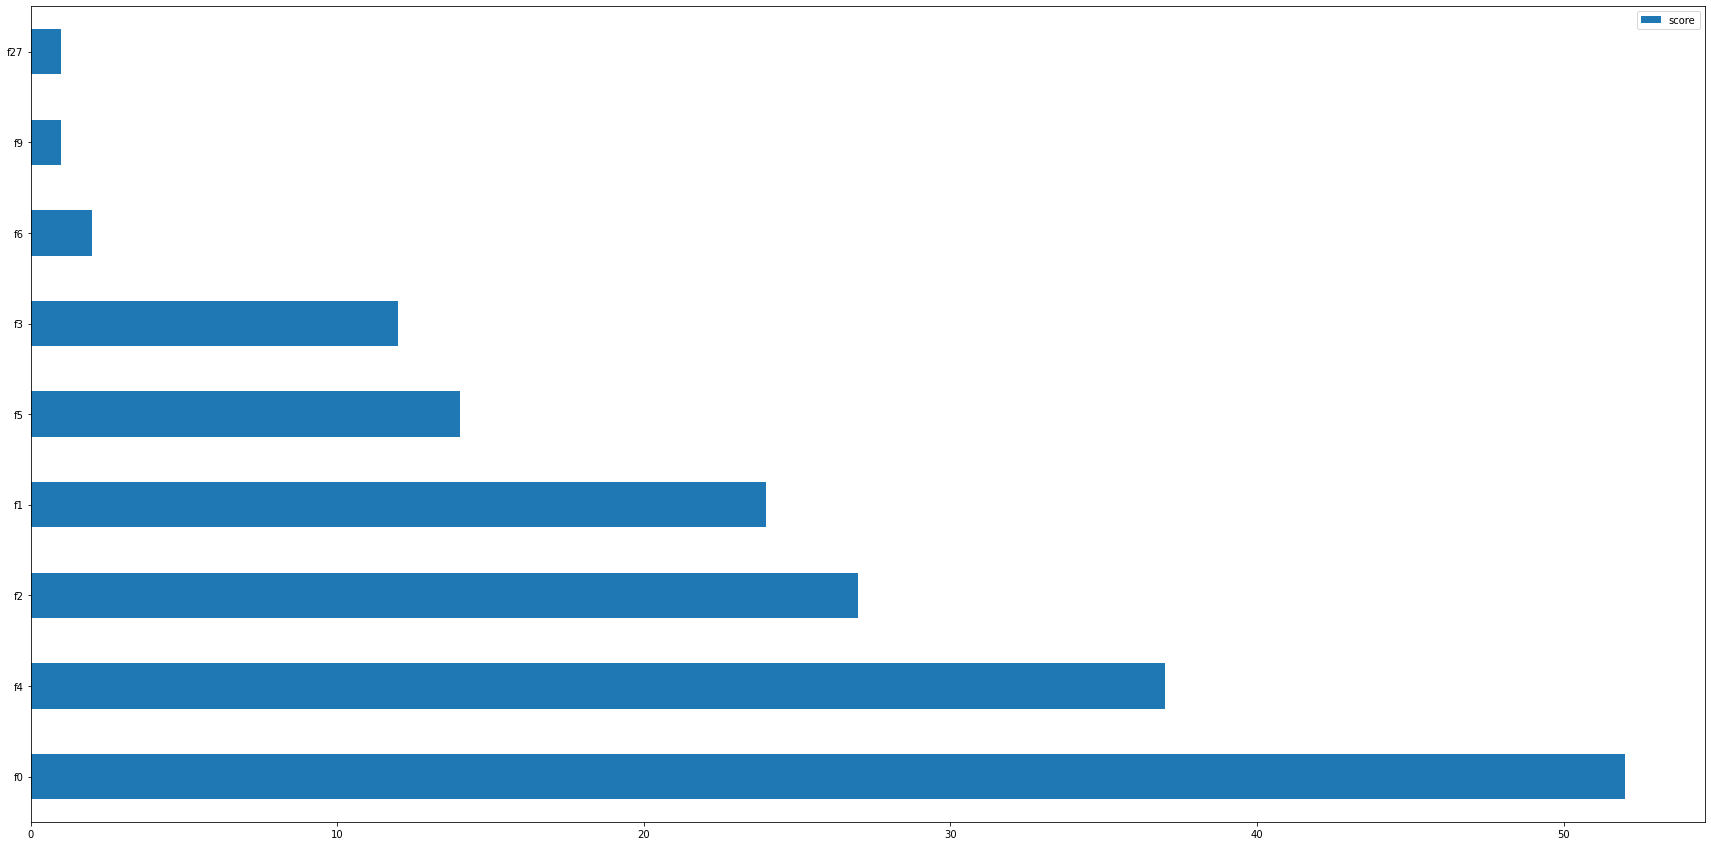

In [31]:
feature_important = xgb_clf.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())


data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.plot(kind='barh',figsize=(30,15))